# Prototype Evaluation Analysis
## One-Way ANOVA and Post-Hoc Analysis for HCI Prototypes

This notebook analyzes user responses comparing four different parking assistance prototypes across two key measures:
1. **Ease of Frustration**: How much would the prototype ease the frustration of finding a parking spot?
2. **Ease of Use**: How easy would the prototype be to use while driving?

### Statistical Approach
- **One-way ANOVA**: To test if there are significant differences between the four prototypes for each measure
- **Tukey HSD Test**: Post-hoc pairwise comparisons if ANOVA shows significant differences

In [61]:

# Summary Table: Mean and Standard Deviation by Prototype and Measure
summary = pd.concat([
    frustration_stats[['Mean', 'Std']].assign(Measure='Ease of Frustration'),
    ease_stats[['Mean', 'Std']].assign(Measure='Ease of Use')
])
summary = summary.reset_index().rename(columns={'index': 'Prototype'})
print("\n" + "="*80)
print("SUMMARY TABLE: MEAN AND STANDARD DEVIATION")
print("="*80)
print(summary[['Prototype', 'Measure', 'Mean', 'Std']].round(3))



SUMMARY TABLE: MEAN AND STANDARD DEVIATION
     Prototype              Measure   Mean    Std
0  Prototype 1  Ease of Frustration  3.059  0.966
1  Prototype 2  Ease of Frustration  3.882  0.697
2  Prototype 3  Ease of Frustration  3.588  0.870
3  Prototype 4  Ease of Frustration  3.059  1.298
4  Prototype 1          Ease of Use  3.588  1.004
5  Prototype 2          Ease of Use  3.706  1.047
6  Prototype 3          Ease of Use  3.176  1.074
7  Prototype 4          Ease of Use  3.471  1.419


## 1. Data Loading and Preprocessing

In [62]:
# Load the data
df = pd.read_csv('Initial Prototype Responses - HCI Group 47 Project - Table.csv')

# Display basic information
print(f"Total responses: {len(df)}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Total responses: 17

Column names:
1. response
2. Were you able to open Prototype 1?
3. How much would Prototype 1 ease the frustration of finding a parking spot?
4. How easy would Prototype 1 be to use while driving?
5. What feature would improve Prototype 1 the most?
6. Were you able to open Prototype 2?
7. How much would Prototype 2 ease the frustration of finding a parking spot?
8. How easy would Prototype 2 be to use while driving?
9. What feature would improve Prototype 2 the most?
10. Were you able to open Prototype 3?
11. How much would Prototype 3 ease the frustration of finding a parking spot?
12. How easy would Prototype 3 be to use while driving?
13. What feature would improve Prototype 3 the most?
14. Were you able to open Prototype 4?
15. How much would Prototype 4 ease the frustration of finding a parking spot?
16. How easy would Prototype 4 be to use while driving?
17. What feature would improve Prototype 4 the most?
18. Which prototype do you believe would save the mos

In [63]:
# Define Likert scale mappings
frustration_mapping = {
    '1 - Not at all': 1,
    '2 - A little': 2,
    '3 - Some': 3,
    '4 - A lot': 4,
    '5 - Completely': 5
}

ease_mapping = {
    '1 - Very Difficult': 1,
    '2 - Difficult': 2,
    '3 - Neutral': 3,
    '4 - Easy': 4,
    '5 - Very Easy': 5
}

# Extract and convert Likert responses for each prototype
# Frustration columns
frustration_cols = [
    'How much would Prototype 1 ease the frustration of finding a parking spot?',
    'How much would Prototype 2 ease the frustration of finding a parking spot?',
    'How much would Prototype 3 ease the frustration of finding a parking spot?',
    'How much would Prototype 4 ease the frustration of finding a parking spot?'
]

# Ease of use columns
ease_cols = [
    'How easy would Prototype 1 be to use while driving?',
    'How easy would Prototype 2 be to use while driving?',
    'How easy would Prototype 3 be to use while driving?',
    'How easy would Prototype 4 be to use while driving?'
]

# Create numeric columns
for i, col in enumerate(frustration_cols, 1):
    df[f'P{i}_frustration_numeric'] = df[col].map(frustration_mapping)

for i, col in enumerate(ease_cols, 1):
    df[f'P{i}_ease_numeric'] = df[col].map(ease_mapping)

# Display sample of converted data
print("Sample of converted data:")
print(df[['P1_frustration_numeric', 'P1_ease_numeric', 'P2_frustration_numeric', 'P2_ease_numeric']].head())

Sample of converted data:
   P1_frustration_numeric  P1_ease_numeric  P2_frustration_numeric  \
0                       2                3                       4   
1                       4                4                       3   
2                       3                2                       4   
3                       5                5                       5   
4                       3                3                       2   

   P2_ease_numeric  
0                3  
1                1  
2                4  
3                5  
4                2  


In [64]:
# Prepare data for ANOVA (long format)
# For frustration measure
frustration_data = []
for i in range(1, 5):
    for value in df[f'P{i}_frustration_numeric'].dropna():
        frustration_data.append({'Prototype': f'Prototype {i}', 'Score': value})

df_frustration = pd.DataFrame(frustration_data)

# For ease of use measure
ease_data = []
for i in range(1, 5):
    for value in df[f'P{i}_ease_numeric'].dropna():
        ease_data.append({'Prototype': f'Prototype {i}', 'Score': value})

df_ease = pd.DataFrame(ease_data)

print("Data prepared for analysis")
print(f"\nFrustration data shape: {df_frustration.shape}")
print(f"Ease of use data shape: {df_ease.shape}")

Data prepared for analysis

Frustration data shape: (68, 2)
Ease of use data shape: (68, 2)


## 2. Descriptive Statistics

In [65]:
# Calculate descriptive statistics
print("="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)

print("\n" + "*"*80)
print("Ease of Frustration (How much would prototype ease frustration?)")
print("*"*80)
frustration_stats = df_frustration.groupby('Prototype')['Score'].agg([
    ('N', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Median', 'median'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(3)
print(frustration_stats)

print("\n" + "*"*80)
print("Ease of Use (How easy to use while driving?)")
print("*"*80)
ease_stats = df_ease.groupby('Prototype')['Score'].agg([
    ('N', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Median', 'median'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(3)
print(ease_stats)

DESCRIPTIVE STATISTICS

********************************************************************************
Ease of Frustration (How much would prototype ease frustration?)
********************************************************************************
              N   Mean    Std  Median  Min  Max
Prototype                                      
Prototype 1  17  3.059  0.966     3.0    2    5
Prototype 2  17  3.882  0.697     4.0    2    5
Prototype 3  17  3.588  0.870     3.0    2    5
Prototype 4  17  3.059  1.298     3.0    1    5

********************************************************************************
Ease of Use (How easy to use while driving?)
********************************************************************************
              N   Mean    Std  Median  Min  Max
Prototype                                      
Prototype 1  17  3.588  1.004     3.0    2    5
Prototype 2  17  3.706  1.047     4.0    1    5
Prototype 3  17  3.176  1.074     3.0    1    5
Prototype 4  

In [75]:
import pandas as pd

# df should already exist; if not:
# df = pd.read_csv("Initial Prototype Responses - HCI Group 47 Project - Table.csv")

prototype_col = "Prototype"  # change if needed
score_columns = [
    "usability_score",
    "efficiency_score",
    "satisfaction_score",
]  # update with your actual score columns

long_df = df.melt(
    id_vars=[prototype_col],
    value_vars=score_columns,
    var_name="measure",
    value_name="score",
)

summary = (
    long_df
    .groupby([prototype_col, "measure"])["score"]
    .agg(["mean", "std"])
    .reset_index()
    .rename(columns={"mean": "Mean", "std": "StdDev"})
)

summary


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Prototype', 'usability_score', 'efficiency_score', 'satisfaction_score']"

## 3. One-Way ANOVA Tests

In [66]:
# Prepare data groups for ANOVA
frustration_groups = [df[f'P{i}_frustration_numeric'].dropna().values for i in range(1, 5)]
ease_groups = [df[f'P{i}_ease_numeric'].dropna().values for i in range(1, 5)]

# Perform ANOVA for frustration measure
f_stat_frustration, p_value_frustration = f_oneway(*frustration_groups)

# Perform ANOVA for ease of use measure
f_stat_ease, p_value_ease = f_oneway(*ease_groups)

print("="*80)
print("ONE-WAY ANOVA RESULTS")
print("="*80)

print("\n" + "*"*80)
print("Measure 1: Ease of Frustration")
print("*"*80)
print(f"F-statistic: {f_stat_frustration:.4f}")
print(f"p-value: {p_value_frustration:.4f}")
if p_value_frustration < 0.05:
    print("Result: SIGNIFICANT difference between prototypes (p < 0.05)")
    print("→ Post-hoc Tukey HSD test will be performed")
else:
    print("Result: NO significant difference between prototypes (p ≥ 0.05)")

print("\n" + "*"*80)
print("Measure 2: Ease of Use")
print("*"*80)
print(f"F-statistic: {f_stat_ease:.4f}")
print(f"p-value: {p_value_ease:.4f}")
if p_value_ease < 0.05:
    print("Result: SIGNIFICANT difference between prototypes (p < 0.05)")
    print("→ Post-hoc Tukey HSD test will be performed")
else:
    print("Result: NO significant difference between prototypes (p ≥ 0.05)")

print("\n" + "="*80)

ONE-WAY ANOVA RESULTS

********************************************************************************
Measure 1: Ease of Frustration
********************************************************************************
F-statistic: 2.9410
p-value: 0.0397
Result: SIGNIFICANT difference between prototypes (p < 0.05)
→ Post-hoc Tukey HSD test will be performed

********************************************************************************
Measure 2: Ease of Use
********************************************************************************
F-statistic: 0.6657
p-value: 0.5762
Result: NO significant difference between prototypes (p ≥ 0.05)



## 4. Post-Hoc Tukey HSD Tests

Tukey's Honest Significant Difference (HSD) test will be performed for any measures showing significant differences in the ANOVA.

In [67]:
# Tukey HSD for frustration measure (if significant)
if p_value_frustration < 0.05:
    print("="*80)
    print("TUKEY HSD POST-HOC TEST: Ease of Frustration")
    print("="*80)
    tukey_frustration = pairwise_tukeyhsd(endog=df_frustration['Score'], 
                                          groups=df_frustration['Prototype'], 
                                          alpha=0.05)
    print(tukey_frustration)
    print("\n")
    
    # Create summary of significant differences
    tukey_df_frustration = pd.DataFrame(data=tukey_frustration.summary().data[1:], 
                                        columns=tukey_frustration.summary().data[0])
    significant_frustration = tukey_df_frustration[tukey_df_frustration['reject'] == True]
    
    if len(significant_frustration) > 0:
        print("Significant pairwise differences (p < 0.05):")
        for idx, row in significant_frustration.iterrows():
            print(f"  • {row['group1']} vs {row['group2']}: Mean diff = {row['meandiff']}, p-adj = {row['p-adj']}")
    else:
        print("No significant pairwise differences found in post-hoc analysis.")
else:
    print("Skipping Tukey HSD for frustration measure (ANOVA was not significant)")
    tukey_frustration = None

TUKEY HSD POST-HOC TEST: Ease of Frustration
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
Prototype 1 Prototype 2   0.8235  0.079 -0.0653 1.7124  False
Prototype 1 Prototype 3   0.5294 0.4022 -0.3594 1.4182  False
Prototype 1 Prototype 4      0.0    1.0 -0.8888 0.8888  False
Prototype 2 Prototype 3  -0.2941 0.8188 -1.1829 0.5947  False
Prototype 2 Prototype 4  -0.8235  0.079 -1.7124 0.0653  False
Prototype 3 Prototype 4  -0.5294 0.4022 -1.4182 0.3594  False
-------------------------------------------------------------


No significant pairwise differences found in post-hoc analysis.


In [68]:
# Tukey HSD for ease of use measure (if significant)
if p_value_ease < 0.05:
    print("="*80)
    print("TUKEY HSD POST-HOC TEST: Ease of Use")
    print("="*80)
    tukey_ease = pairwise_tukeyhsd(endog=df_ease['Score'], 
                                   groups=df_ease['Prototype'], 
                                   alpha=0.05)
    print(tukey_ease)
    print("\n")
    
    # Create summary of significant differences
    tukey_df_ease = pd.DataFrame(data=tukey_ease.summary().data[1:], 
                                 columns=tukey_ease.summary().data[0])
    significant_ease = tukey_df_ease[tukey_df_ease['reject'] == True]
    
    if len(significant_ease) > 0:
        print("Significant pairwise differences (p < 0.05):")
        for idx, row in significant_ease.iterrows():
            print(f"  • {row['group1']} vs {row['group2']}: Mean diff = {row['meandiff']}, p-adj = {row['p-adj']}")
    else:
        print("No significant pairwise differences found in post-hoc analysis.")
else:
    print("Skipping Tukey HSD for ease of use measure (ANOVA was not significant)")
    tukey_ease = None

Skipping Tukey HSD for ease of use measure (ANOVA was not significant)


## 5. Visualizations for Publication

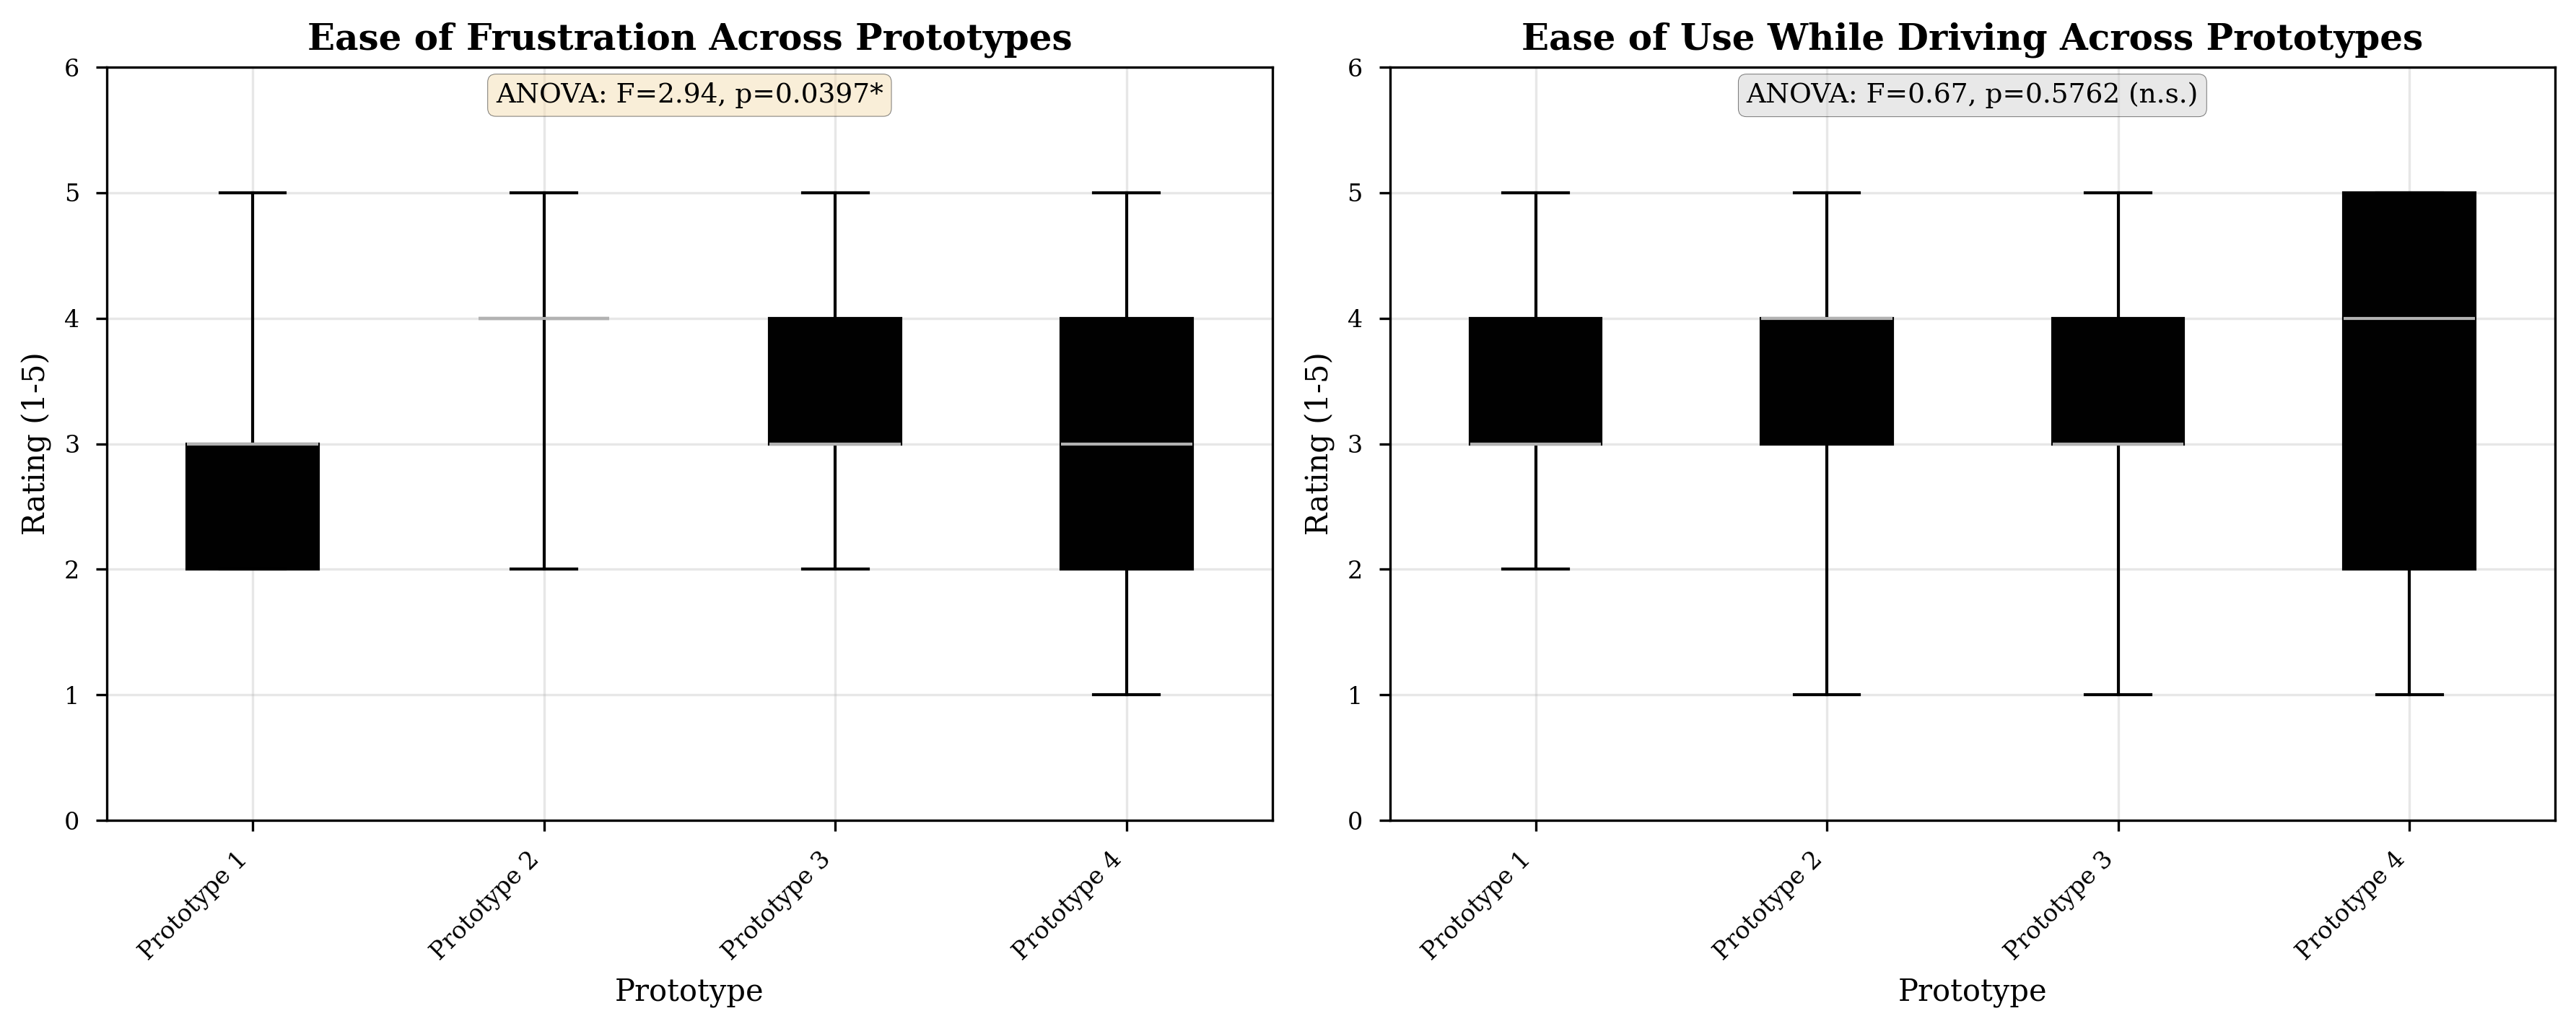

Figure 1 saved: figure1_boxplots.png


In [69]:
# Figure 1: Box plots for both measures
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Frustration box plot
bp1 = df_frustration.boxplot(column='Score', by='Prototype', ax=axes[0], patch_artist=True, whis=[0, 100])
axes[0].set_title('Ease of Frustration Across Prototypes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Prototype', fontsize=10)
axes[0].set_ylabel('Rating (1-5)', fontsize=10)
axes[0].set_ylim(0, 6)
axes[0].grid(True, alpha=0.3)
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')

# Add ANOVA result to plot
if p_value_frustration < 0.05:
    axes[0].text(0.5, 0.98, f'ANOVA: F={f_stat_frustration:.2f}, p={p_value_frustration:.4f}*', 
                transform=axes[0].transAxes, ha='center', va='top', 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=9)
else:
    axes[0].text(0.5, 0.98, f'ANOVA: F={f_stat_frustration:.2f}, p={p_value_frustration:.4f} (n.s.)', 
                transform=axes[0].transAxes, ha='center', va='top', 
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5), fontsize=9)

# Ease of use box plot
bp2 = df_ease.boxplot(column='Score', by='Prototype', ax=axes[1], patch_artist=True, whis=[0, 100])
axes[1].set_title('Ease of Use While Driving Across Prototypes', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Prototype', fontsize=10)
axes[1].set_ylabel('Rating (1-5)', fontsize=10)
axes[1].set_ylim(0, 6)
axes[1].grid(True, alpha=0.3)
plt.sca(axes[1])
plt.xticks(rotation=45, ha='right')

# Add ANOVA result to plot
if p_value_ease < 0.05:
    axes[1].text(0.5, 0.98, f'ANOVA: F={f_stat_ease:.2f}, p={p_value_ease:.4f}*', 
                transform=axes[1].transAxes, ha='center', va='top', 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=9)
else:
    axes[1].text(0.5, 0.98, f'ANOVA: F={f_stat_ease:.2f}, p={p_value_ease:.4f} (n.s.)', 
                transform=axes[1].transAxes, ha='center', va='top', 
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5), fontsize=9)

plt.suptitle('')  # Remove the automatic title
plt.tight_layout()
plt.savefig('figure1_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 1 saved: figure1_boxplots.png")

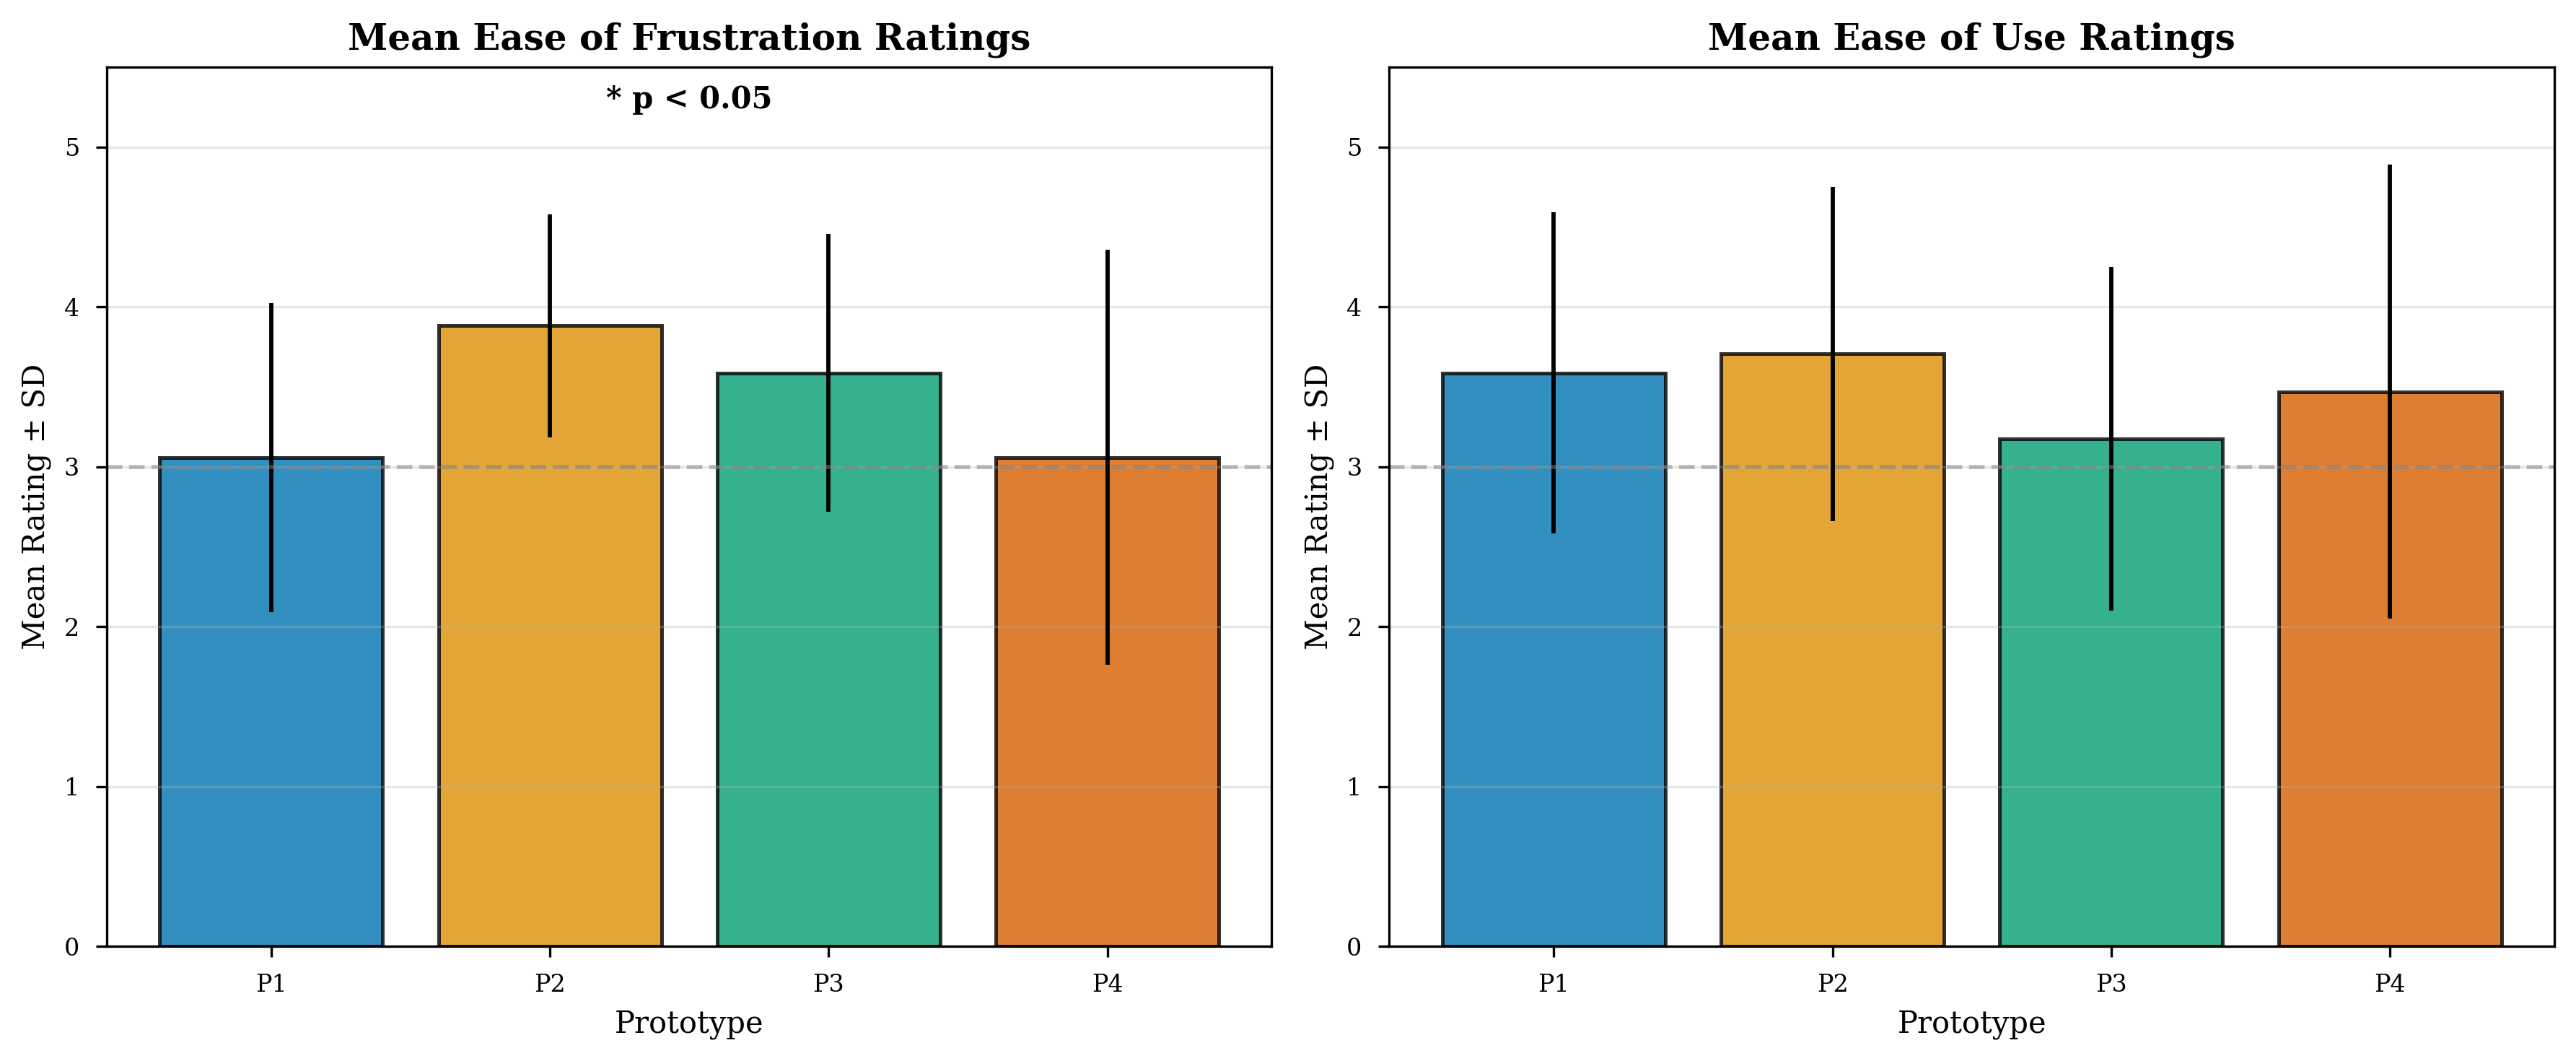

Figure 2 saved: figure2_barplots.png


In [70]:
# Figure 2: Bar plots with error bars (mean ± SD)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Calculate means and standard errors
frustration_means = df_frustration.groupby('Prototype')['Score'].mean()
frustration_std = df_frustration.groupby('Prototype')['Score'].std()
ease_means = df_ease.groupby('Prototype')['Score'].mean()
ease_std = df_ease.groupby('Prototype')['Score'].std()

# Frustration bar plot
x_pos = np.arange(len(frustration_means))
colors = sns.color_palette("colorblind", 4)

axes[0].bar(x_pos, frustration_means, yerr=frustration_std, 
           capsize=5, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
axes[0].set_title('Mean Ease of Frustration Ratings', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Prototype', fontsize=10)
axes[0].set_ylabel('Mean Rating ± SD', fontsize=10)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(['P1', 'P2', 'P3', 'P4'])
axes[0].set_ylim(0, 5.5)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Neutral (3)')

# Add significance indicator if applicable
if p_value_frustration < 0.05:
    axes[0].text(0.5, 0.98, '* p < 0.05', 
                transform=axes[0].transAxes, ha='center', va='top', 
                fontsize=10, fontweight='bold')

# Ease of use bar plot
axes[1].bar(x_pos, ease_means, yerr=ease_std, 
           capsize=5, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
axes[1].set_title('Mean Ease of Use Ratings', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Prototype', fontsize=10)
axes[1].set_ylabel('Mean Rating ± SD', fontsize=10)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(['P1', 'P2', 'P3', 'P4'])
axes[1].set_ylim(0, 5.5)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Neutral (3)')

# Add significance indicator if applicable
if p_value_ease < 0.05:
    axes[1].text(0.5, 0.98, '* p < 0.05', 
                transform=axes[1].transAxes, ha='center', va='top', 
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('figure2_barplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 2 saved: figure2_barplots.png")

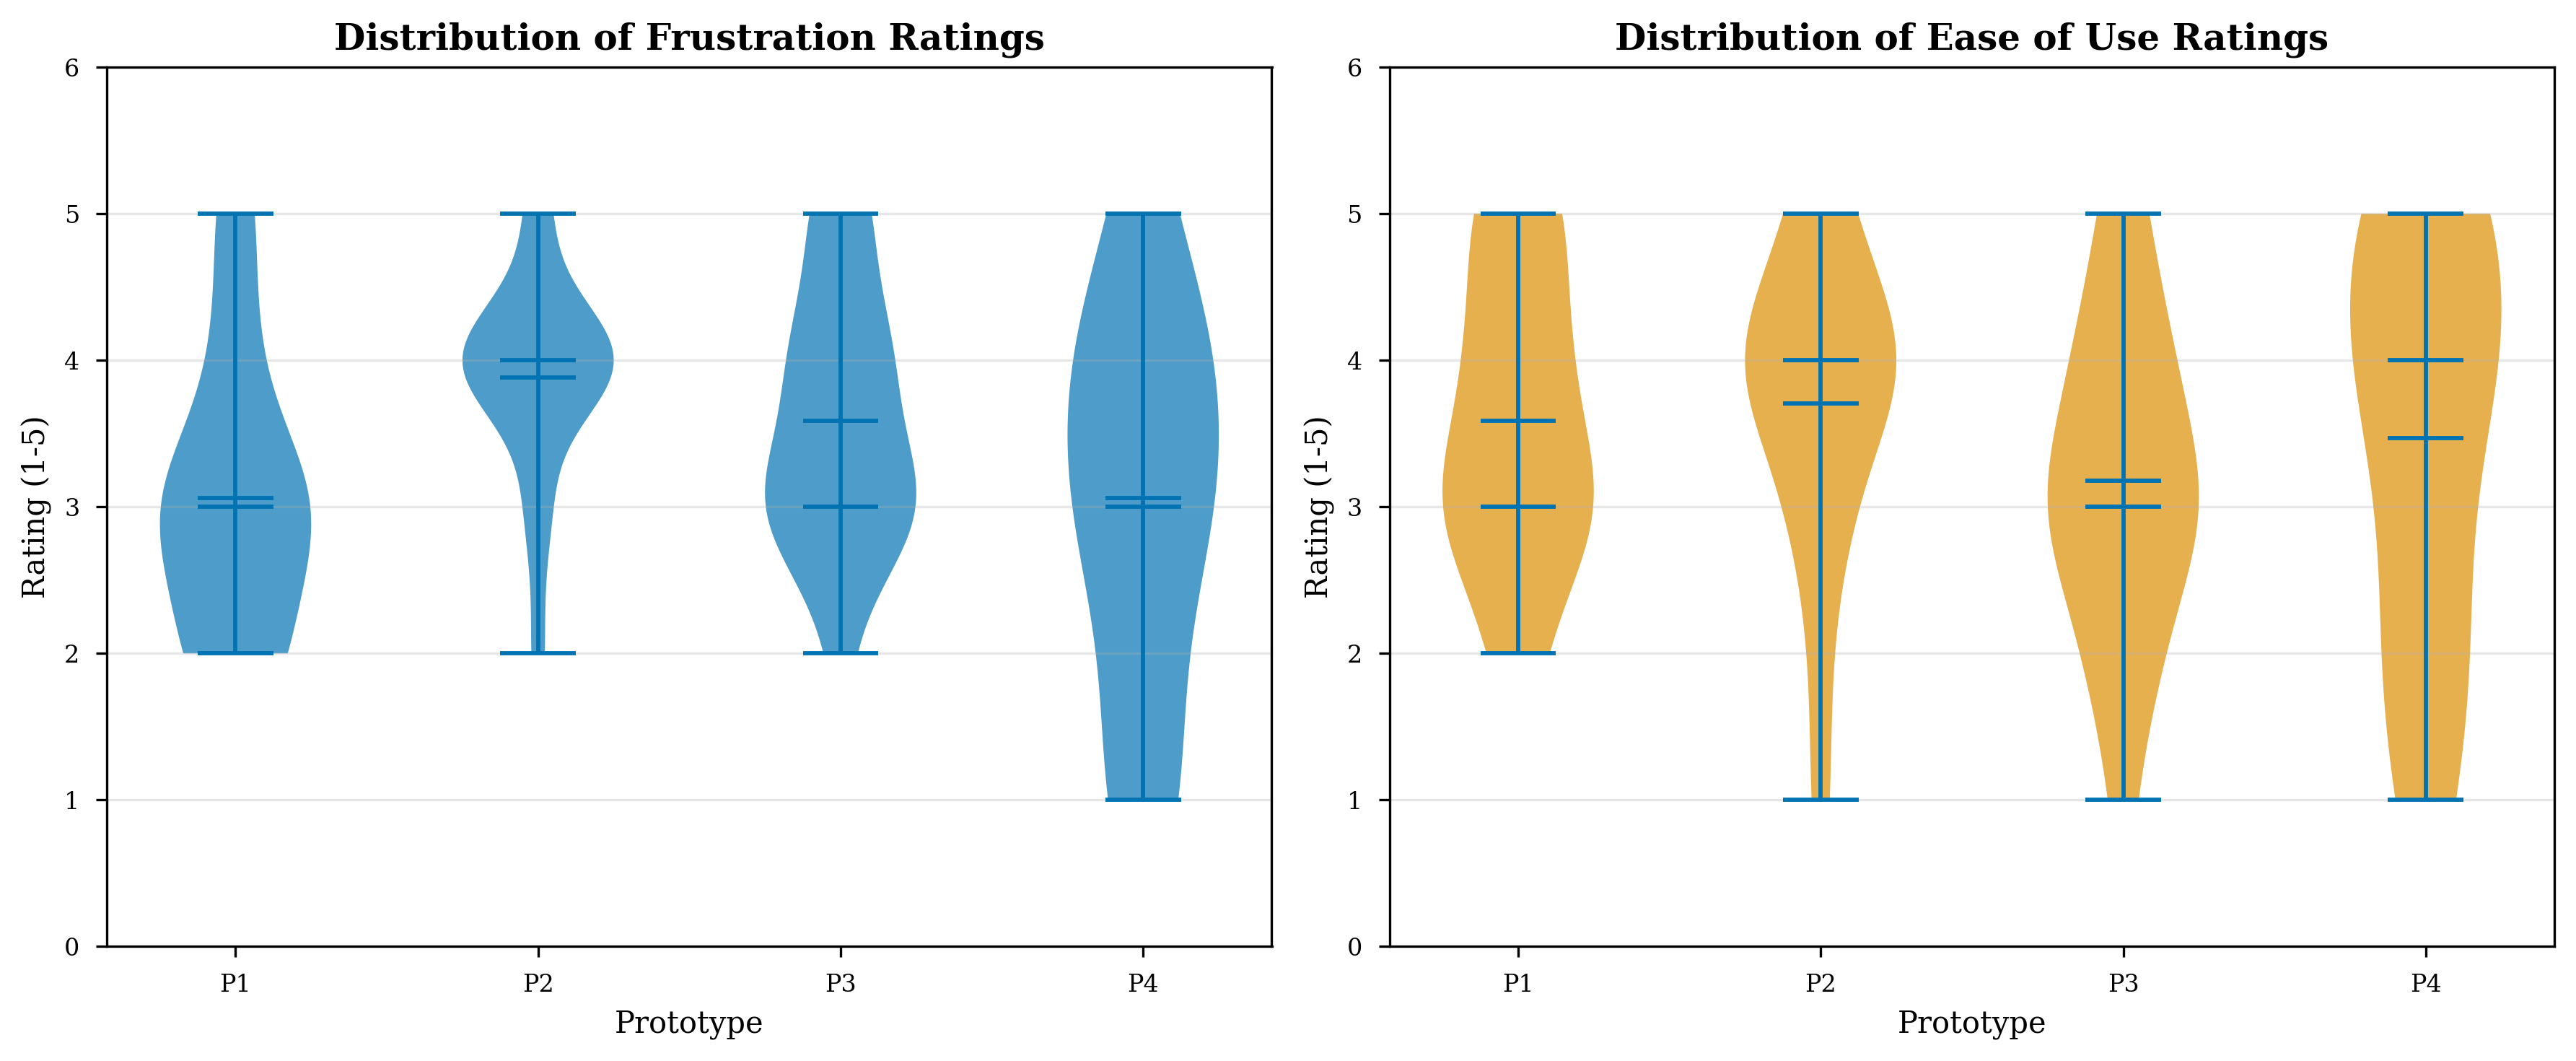

Figure 3 saved: figure3_violinplots.png


In [71]:
# Figure 3: Violin plots (distribution visualization)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Frustration violin plot
parts1 = axes[0].violinplot([df[f'P{i}_frustration_numeric'].dropna() for i in range(1, 5)],
                            positions=range(1, 5), showmeans=True, showmedians=True)
for pc in parts1['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_alpha(0.7)

axes[0].set_title('Distribution of Frustration Ratings', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Prototype', fontsize=10)
axes[0].set_ylabel('Rating (1-5)', fontsize=10)
axes[0].set_xticks(range(1, 5))
axes[0].set_xticklabels(['P1', 'P2', 'P3', 'P4'])
axes[0].set_ylim(0, 6)
axes[0].grid(True, alpha=0.3, axis='y')

# Ease of use violin plot
parts2 = axes[1].violinplot([df[f'P{i}_ease_numeric'].dropna() for i in range(1, 5)],
                            positions=range(1, 5), showmeans=True, showmedians=True)
for pc in parts2['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_alpha(0.7)

axes[1].set_title('Distribution of Ease of Use Ratings', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Prototype', fontsize=10)
axes[1].set_ylabel('Rating (1-5)', fontsize=10)
axes[1].set_xticks(range(1, 5))
axes[1].set_xticklabels(['P1', 'P2', 'P3', 'P4'])
axes[1].set_ylim(0, 6)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('figure3_violinplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 3 saved: figure3_violinplots.png")

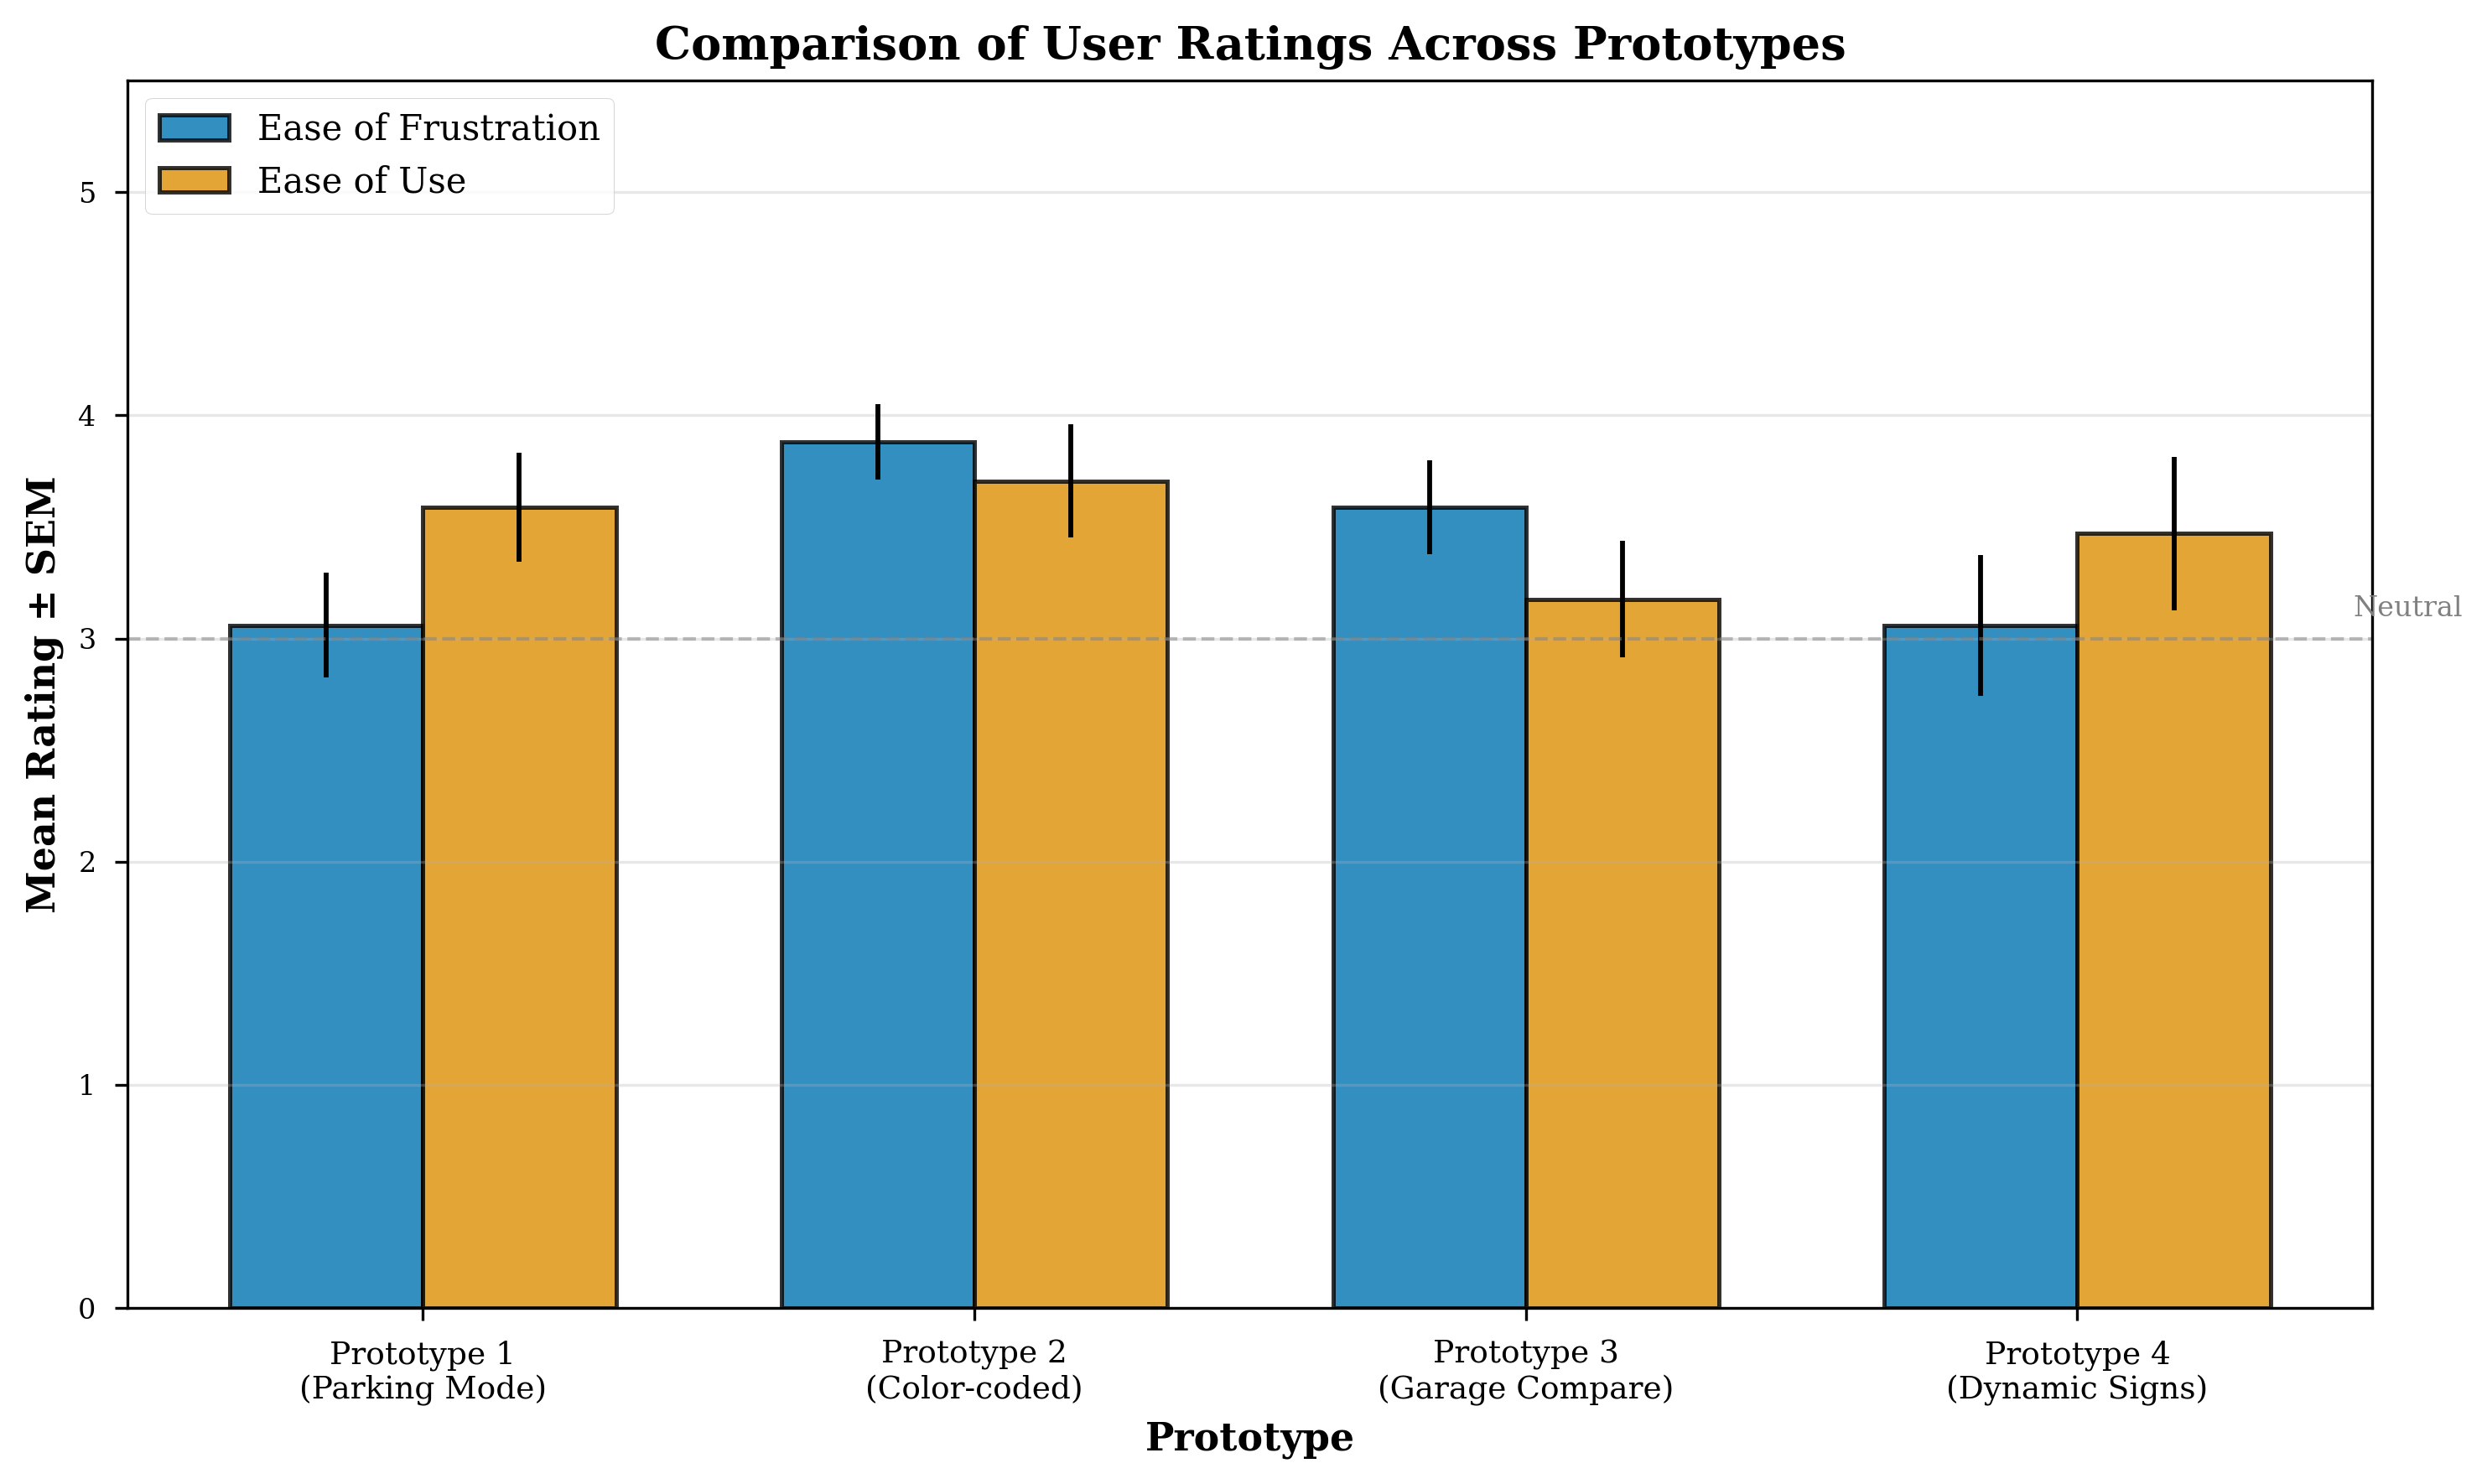

Figure 4 saved: figure4_combined_comparison.png


In [72]:
# Figure 4: Combined comparison plot
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(4)
width = 0.35

# Create grouped bar chart
bars1 = ax.bar(x - width/2, frustration_means, width, yerr=frustration_sem,
              label='Ease of Frustration', capsize=5, color=colors[0], 
              alpha=0.8, edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, ease_means, width, yerr=ease_sem,
              label='Ease of Use', capsize=5, color=colors[1], 
              alpha=0.8, edgecolor='black', linewidth=1.2)

ax.set_xlabel('Prototype', fontsize=11, fontweight='bold')
ax.set_ylabel('Mean Rating ± SEM', fontsize=11, fontweight='bold')
ax.set_title('Comparison of User Ratings Across Prototypes', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Prototype 1\n(Parking Mode)', 'Prototype 2\n(Color-coded)', 
                    'Prototype 3\n(Garage Compare)', 'Prototype 4\n(Dynamic Signs)'],
                   fontsize=9)
ax.legend(fontsize=10, loc='upper left')
ax.set_ylim(0, 5.5)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=3, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Add text annotation for neutral line
ax.text(3.5, 3.1, 'Neutral', fontsize=8, color='gray')

plt.tight_layout()
plt.savefig('figure4_combined_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 4 saved: figure4_combined_comparison.png")

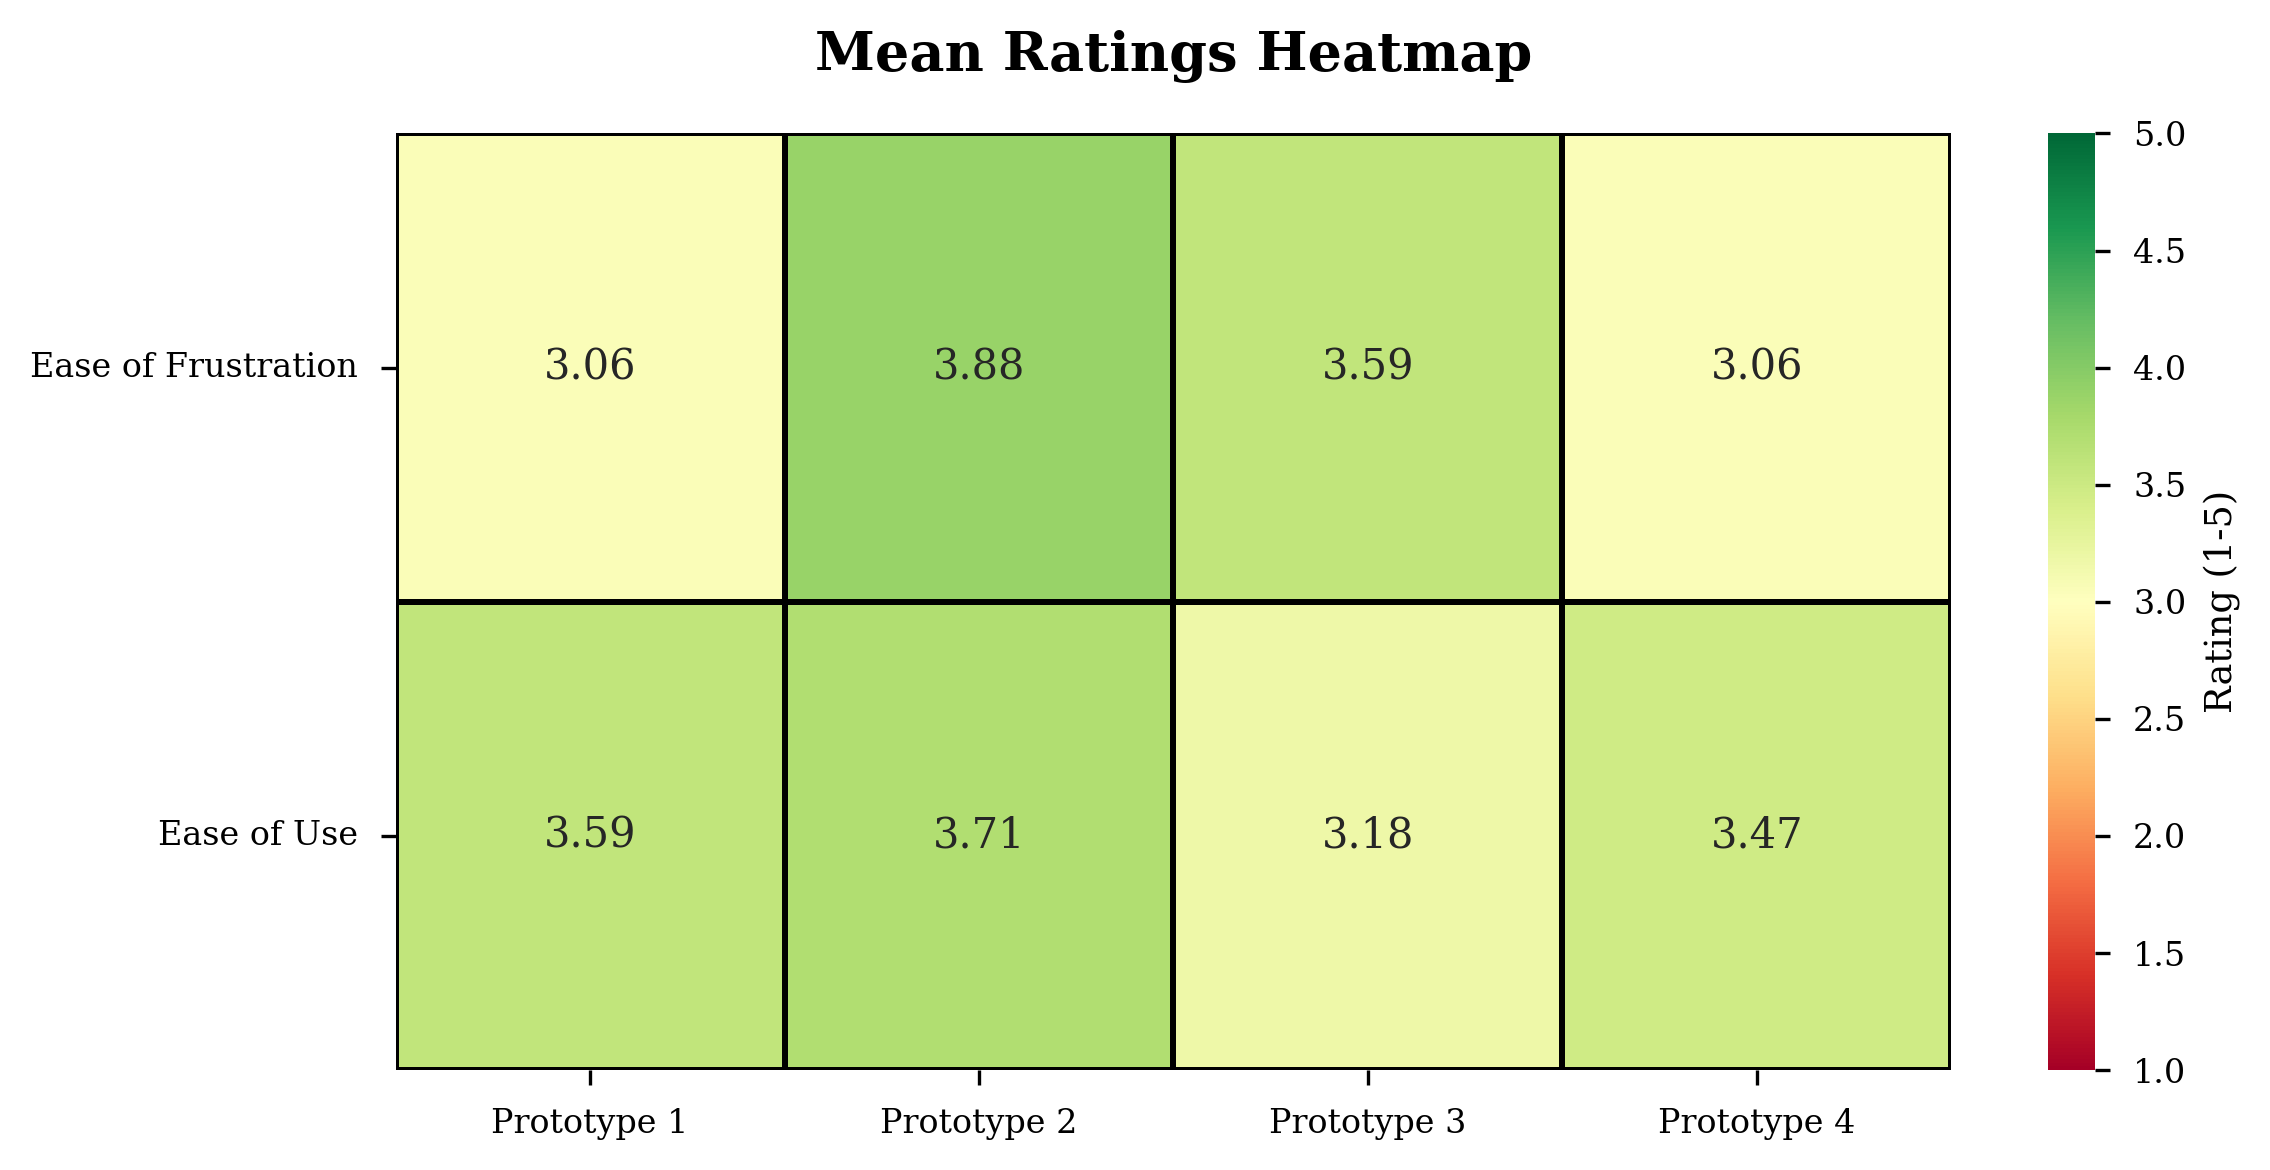

Figure 5 saved: figure5_heatmap.png


In [73]:
# Figure 5: Heatmap of mean ratings
fig, ax = plt.subplots(figsize=(8, 4))

# Prepare data for heatmap
heatmap_data = pd.DataFrame({
    'Prototype 1': [frustration_means[0], ease_means[0]],
    'Prototype 2': [frustration_means[1], ease_means[1]],
    'Prototype 3': [frustration_means[2], ease_means[2]],
    'Prototype 4': [frustration_means[3], ease_means[3]]
}, index=['Ease of Frustration', 'Ease of Use'])

sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdYlGn', 
           vmin=1, vmax=5, center=3, cbar_kws={'label': 'Rating (1-5)'},
           linewidths=1, linecolor='black', ax=ax)

ax.set_title('Mean Ratings Heatmap', fontsize=13, fontweight='bold', pad=15)
ax.set_xlabel('')
ax.set_ylabel('')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('figure5_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 5 saved: figure5_heatmap.png")

## 6. Summary Report

In [74]:
# Generate comprehensive summary report
print("="*80)
print("STATISTICAL ANALYSIS SUMMARY REPORT")
print("="*80)
print(f"\nSample Size: n = {len(df)} participants")
print(f"Number of Prototypes Compared: 4")
print(f"\nMeasures Analyzed:")
print(f"  1. Ease of Frustration (1=Not at all, 5=Completely)")
print(f"  2. Ease of Use While Driving (1=Very Difficult, 5=Very Easy)")

print("\n" + "-"*80)
print("ANOVA RESULTS SUMMARY")
print("-"*80)

print(f"\n1. Ease of Frustration:")
print(f"   F({3}, {len(df_frustration)-4}) = {f_stat_frustration:.4f}, p = {p_value_frustration:.4f}")
if p_value_frustration < 0.05:
    print(f"   → SIGNIFICANT differences found between prototypes")
    print(f"   → Effect: There are statistically significant differences in how much")
    print(f"             the prototypes ease parking frustration")
else:
    print(f"   → NO significant differences found between prototypes")
    print(f"   → Effect: All prototypes are perceived similarly in reducing frustration")

print(f"\n2. Ease of Use While Driving:")
print(f"   F({3}, {len(df_ease)-4}) = {f_stat_ease:.4f}, p = {p_value_ease:.4f}")
if p_value_ease < 0.05:
    print(f"   → SIGNIFICANT differences found between prototypes")
    print(f"   → Effect: There are statistically significant differences in perceived")
    print(f"             ease of use while driving")
else:
    print(f"   → NO significant differences found between prototypes")
    print(f"   → Effect: All prototypes are perceived similarly in ease of use")

print("\n" + "-"*80)
print("RANKING OF PROTOTYPES (by mean score)")
print("-"*80)

print("\nEase of Frustration:")
frustration_ranking = frustration_means.sort_values(ascending=False)
for i, (proto, score) in enumerate(frustration_ranking.items(), 1):
    print(f"  {i}. {proto}: M = {score:.2f} (SD = {df_frustration[df_frustration['Prototype']==proto]['Score'].std():.2f})")

print("\nEase of Use While Driving:")
ease_ranking = ease_means.sort_values(ascending=False)
for i, (proto, score) in enumerate(ease_ranking.items(), 1):
    print(f"  {i}. {proto}: M = {score:.2f} (SD = {df_ease[df_ease['Prototype']==proto]['Score'].std():.2f})")

if p_value_frustration < 0.05 or p_value_ease < 0.05:
    print("\n" + "-"*80)
    print("POST-HOC ANALYSIS SUMMARY")
    print("-"*80)
    
    if p_value_frustration < 0.05 and tukey_frustration is not None:
        print("\nEase of Frustration - Significant Pairwise Differences:")
        tukey_df_frustration = pd.DataFrame(data=tukey_frustration.summary().data[1:], 
                                           columns=tukey_frustration.summary().data[0])
        significant = tukey_df_frustration[tukey_df_frustration['reject'] == True]
        if len(significant) > 0:
            for idx, row in significant.iterrows():
                print(f"  • {row['group1']} vs {row['group2']}: "
                     f"Diff = {float(row['meandiff']):.3f}, p-adj = {float(row['p-adj']):.4f}")
        else:
            print("  (No significant pairwise differences despite overall ANOVA significance)")
    
    if p_value_ease < 0.05 and tukey_ease is not None:
        print("\nEase of Use - Significant Pairwise Differences:")
        tukey_df_ease = pd.DataFrame(data=tukey_ease.summary().data[1:], 
                                    columns=tukey_ease.summary().data[0])
        significant = tukey_df_ease[tukey_df_ease['reject'] == True]
        if len(significant) > 0:
            for idx, row in significant.iterrows():
                print(f"  • {row['group1']} vs {row['group2']}: "
                     f"Diff = {float(row['meandiff']):.3f}, p-adj = {float(row['p-adj']):.4f}")
        else:
            print("  (No significant pairwise differences despite overall ANOVA significance)")

print("\n" + "="*80)
print("CONCLUSION")
print("="*80)

if p_value_frustration < 0.05 or p_value_ease < 0.05:
    print("\nThe statistical analysis reveals significant differences between prototypes.")
    print("Designers should prioritize the higher-rated prototypes for further development.")
else:
    print("\nThe statistical analysis shows no significant differences between prototypes.")
    print("This suggests users perceive all prototypes similarly on the measured dimensions.")
    print("Other factors (cost, implementation complexity, user preferences) should guide")
    print("prototype selection.")

print("\nFigures generated:")
print("  • figure1_boxplots.png - Distribution comparison")
print("  • figure2_barplots.png - Mean ratings with error bars")
print("  • figure3_violinplots.png - Detailed distribution visualization")
print("  • figure4_combined_comparison.png - Side-by-side measure comparison")
print("  • figure5_heatmap.png - Mean ratings overview")
print("\n" + "="*80)

STATISTICAL ANALYSIS SUMMARY REPORT

Sample Size: n = 17 participants
Number of Prototypes Compared: 4

Measures Analyzed:
  1. Ease of Frustration (1=Not at all, 5=Completely)
  2. Ease of Use While Driving (1=Very Difficult, 5=Very Easy)

--------------------------------------------------------------------------------
ANOVA RESULTS SUMMARY
--------------------------------------------------------------------------------

1. Ease of Frustration:
   F(3, 64) = 2.9410, p = 0.0397
   → SIGNIFICANT differences found between prototypes
   → Effect: There are statistically significant differences in how much
             the prototypes ease parking frustration

2. Ease of Use While Driving:
   F(3, 64) = 0.6657, p = 0.5762
   → NO significant differences found between prototypes
   → Effect: All prototypes are perceived similarly in ease of use

--------------------------------------------------------------------------------
RANKING OF PROTOTYPES (by mean score)
-----------------------------